#### Digits MNIST - Ai notebook
// Code by Om

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset

(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

print(f"Training data shape: {training_images.shape}")

Training data shape: (60000, 28, 28)


Label for the image: 4


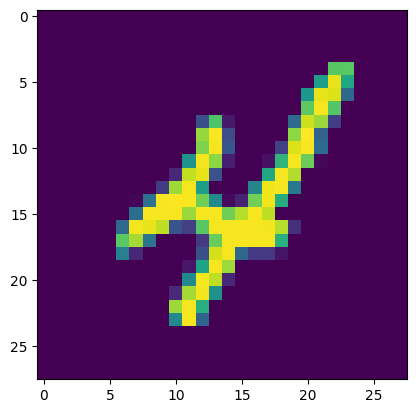

In [3]:
plt.imshow(training_images[9])
print(f"Label for the image: {training_labels[9]}")

In [4]:
# Normalize the data
training_images = training_images/255.0

##### Create and compile the model

In [5]:
# Create the Sequential model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

print(model.summary())

2025-06-14 16:57:25.008688: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-14 16:57:25.008860: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-14 16:57:25.008875: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1749900445.009238 10998668 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1749900445.009320 10998668 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

##### Earlystopping callback

In [7]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
#     Callback should run on epoch end
    def on_epoch_end(self, epoch, logs=None):
#         Stop when accuracy is more than or equal to 98%
        if logs['accuracy'] >= 0.91:
            self.model.stop_training = True
            print("\nReached 91% accuracy .... so stopping training")

##### Training the model

In [8]:
# Training the model
model.fit(x=training_images, y=training_labels, epochs=10, callbacks=[EarlyStoppingCallback()])

Epoch 1/10


2025-06-14 16:57:31.932258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8613 - loss: 0.4865
Epoch 2/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9140 - loss: 0.3121
Reached 91% accuracy .... so stopping training
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9140 - loss: 0.3122


#### Improving the model using CNNs

In [11]:
# Resizing & normalization
training_images = training_images.reshape(-1, 28, 28, 1)
training_images = training_images/255.0

In [12]:
training_images.shape

(60000, 28, 28, 1)

In [14]:
# Callback when accuracy >= 95%
class EarlyStopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # End when accuracy is more than 95%
        if logs['accuracy'] >= 0.95:
            model.stop_training = True
            print("\nStopping training because accuracy >= 95%")

In [19]:
# Define the model

cnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile and train the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(training_images, training_labels, epochs=5, callbacks=[EarlyStopCallback()])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6432 - loss: 1.1867
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8986 - loss: 0.3460
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9073 - loss: 0.3165
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9122 - loss: 0.3063
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9124 - loss: 0.3125
